<html id="* 第3章-予測分布をSageで試す">
	<author>Hiroshi TAKEMOTO</author>
	(<email>take.pwave@gmail.com</email>)
	
	<h1>第3章-予測分布をSageで試す</h1>
	<p>
		<a href="http://sage.math.canterbury.ac.nz/home/pub/91/">第3章-Sageを使って逐次ベイズ学習を試してみる</a>では、
		重みwの分布について解いていましたが、
		実際には新しいｘの値たいするtを予測することが目的となります。
		ここではPRML3.3.2の予測分布、図3.8
		
		<table style="border-style: none;">
			<tr style="border-style: none;">
				<td style="border-style: none;"><img src="images/03/Figure3.8a.png" width="250"></td>
				<td style="border-style: none;"><img src="images/03/Figure3.8b.png" width="250"></td>
			</tr>
			<tr style="border-style: none;">
				<td style="border-style: none;"><img src="images/03/Figure3.8c.png" width="250"></td>
				<td style="border-style: none;"><img src="images/03/Figure3.8d.png" width="250"></td>
			</tr>
		</table>
		
		をSageを使って試してみます。
	</p>	
</html>

<html id="*** 準備">
	<h3>準備</h3>
	<p>
		<a href="http://localhost:8888/notebooks/notebook/notebook/PRML/01-Liear_Regression.ipynb">第1章-Sageを使って線形回帰を試してみる</a>
		で使ったデータと同じものを座標Xと目的値tにセットし、関数Φを定義します。
	</p>
</html>

In [1]:
# PRML fig.3.8の再現
# PRMLのsin曲線のデータ
data = matrix([
        [0.000000, 0.349486],
        [0.111111, 0.830839],
        [0.222222, 1.007332],
        [0.333333, 0.971507],
        [0.444444, 0.133066],
        [0.555556, 0.166823],
        [0.666667, -0.848307],
        [0.777778, -0.445686],
        [0.888889, -0.563567],
        [1.000000, 0.261502],
        ]);
X = data.column(0)
t = data.column(1)
# データを増やす場合
# N = 25
# X = vector([random() for i in range(25)])
# t = vector([(sin(2*pi*x) + +gauss(0, 0.2)).n() for x in X.list()])

In [2]:
# データのプロット
x = var('x')
sin_plt = plot(sin(2*pi*x),[x, 0, 1], rgbcolor='green')
data_plt = list_plot(zip(X, t))

<html id="*** ガウス基底関数の定義">
	<h3>ガウス基底関数の定義</h3>
	<p>
		<a href="http://sage.math.canterbury.ac.nz/home/pub/95/">第3章-エビデンス近似をSageで試す</a>
		のようにガウス基底関数を定義しますが、今回は0から1の範囲で定義します。
	</p>
	<p>
		近似に使う場合には、_phiのようにj=0が1となるような項を追加します。
	</p>
</html>

In [3]:
from pylab import linspace
# 定数をセット
M=9
mu = linspace(0, 1, M)
s = 0.1
s_sq = (s)^2
# ガウス基底関数
def _phi_gauss(x, j):
    return e^(-1*(x - mu[j])^2/(2* s_sq))

In [4]:
# ガウス基底関数で三角関数の例題を近似
# j=0に対応するため_phiを以下のように定義
def _phi(x, j):
    if j == 0:
        return 1
    else:
        return _phi_gauss(x, j-1)
# 初期化
alpha = 2
beta = 25

<html id="** 予測分布">
	<h2>予測分布</h2>
	<p>
		予測分布は、式(3.58)
$$
		p(t|x, t, \alpha, \beta) = \mathcal{N}(t|m_N^T\phi(x), \sigma_N^2(x))
$$
		から計算し、その分散$\sigma_N^2(x)$は、
$$
		\sigma_N^2(x) = \frac{1}{\beta} + \phi(x)^T S_N \phi(x)
$$
		で与えられます。
	</p>
</html>

In [5]:
# 予測分布をプロットする
def _plot_predict(X, t):
    Phi = matrix(RDF, [[ _phi(x,j) for j in range(0, (M+1))] for x in X.list()]) 
    Phi_t = Phi.transpose()
    Phi_dag = (alpha*matrix((M+1),(M+1),1) + beta*Phi_t * Phi).inverse()*Phi_t;
    # 平均の重み
    Wml = beta*Phi_dag * t
    f = lambda x : (sum((Wml[i]*_phi(x, i)) for i in range(0, (M+1))))
    # 分散(標準偏差)
    def s(x):
        phi_x = vector([_phi(x, i).n() for i in range(M+1)])
        S = (alpha*matrix((M+1),(M+1),1) + beta*Phi_t * Phi).inverse()
        s_sqr = 1/beta + phi_x * S * phi_x
        return sqrt(s_sqr)
    data_plt = list_plot(zip(X, t))
    s_u_plt = plot(lambda x : f(x) + s(x), [x, 0, 1],  rgbcolor='grey')
    s_d_plt = plot(lambda x : f(x) - s(x), [x, 0, 1],  rgbcolor='grey')
    y_plt = plot(f, [x, 0, 1],  rgbcolor='red')
    (y_plt + data_plt + sin_plt + s_u_plt + s_d_plt).show(ymin=-1.5, ymax=1.5, figsize=4)

<html id="*** 予測分布のプロット">
	<h3>予測分布のプロット</h3>
	<p>
		以下にM=1, 2, 4, 10の予測分布を示します。パラメータは、
		<ul>
			<li>$\alpha = 2$</li>
			<li>$\beta = 25$</li>
		</ul>
		としました。
	</p>
</html>

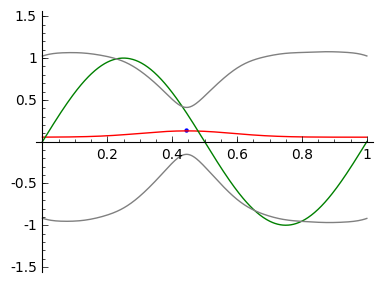

In [6]:
# 1点の場合
X_ = vector([X[4]])
t_ = vector([t[4]])
_plot_predict(X_, t_)

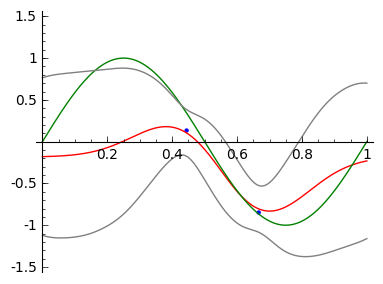

In [7]:
# 2点の場合
X_ = vector([X[4], X[6]])
t_ = vector([t[4], t[6]])
_plot_predict(X_, t_)

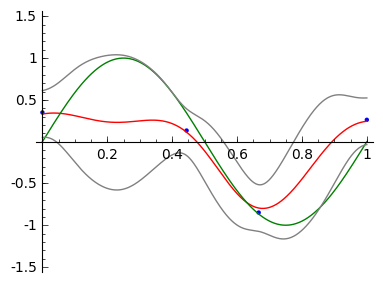

In [8]:
# 4点の場合
X_ = vector([X[0], X[4], X[6], X[9]])
t_ = vector([t[0], t[4], t[6], t[9]])
_plot_predict(X_, t_)

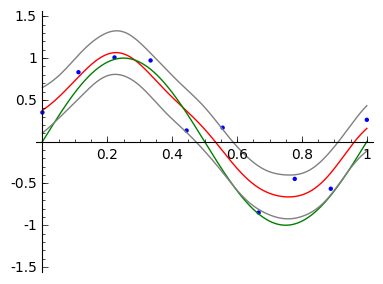

In [9]:
# 10点の場合
_plot_predict(X, t)